In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [3]:
HF=pd.read_csv('heart_failure.csv')

In [4]:
HF.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
#Cek jumlah baris and kolom
HF.shape

(299, 13)

In [8]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
HF.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

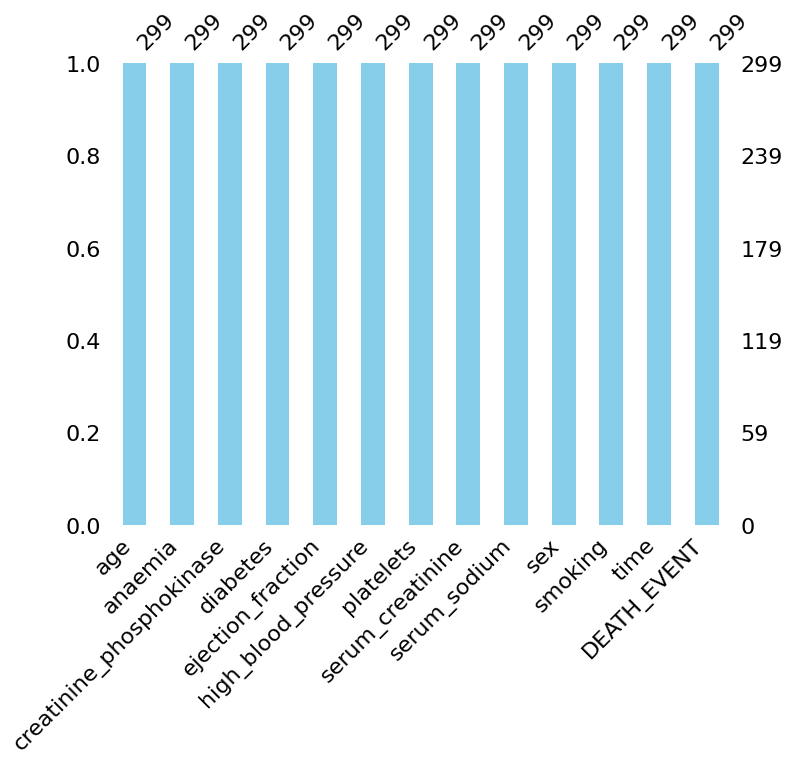

In [11]:
import missingno as msno
msno.bar(HF,figsize=(8,6),color='skyblue')
plt.show()

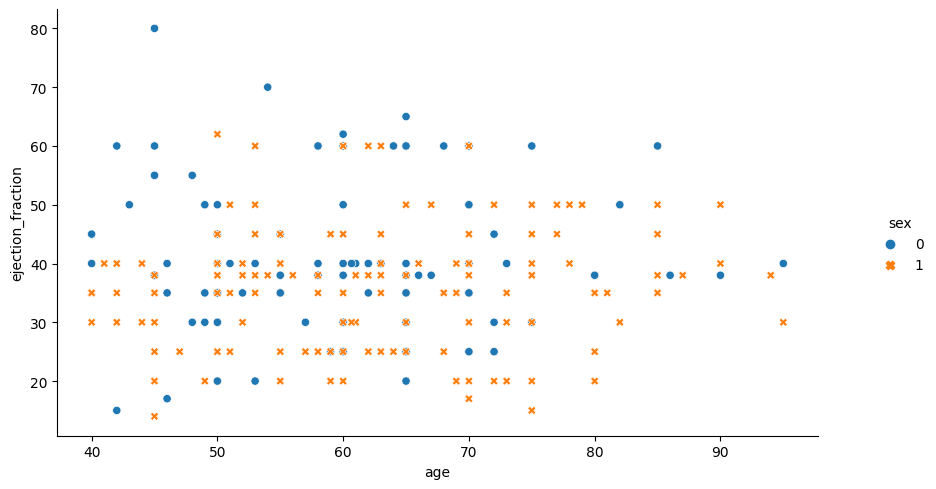

In [21]:
# Scatterplot
g=sns.relplot(x='age',y='ejection_fraction',data=HF,hue='sex',style='sex')
g.fig.set_size_inches(10,5)
plt.show()

In [23]:
# Cek korelasi antar fitur
HF.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


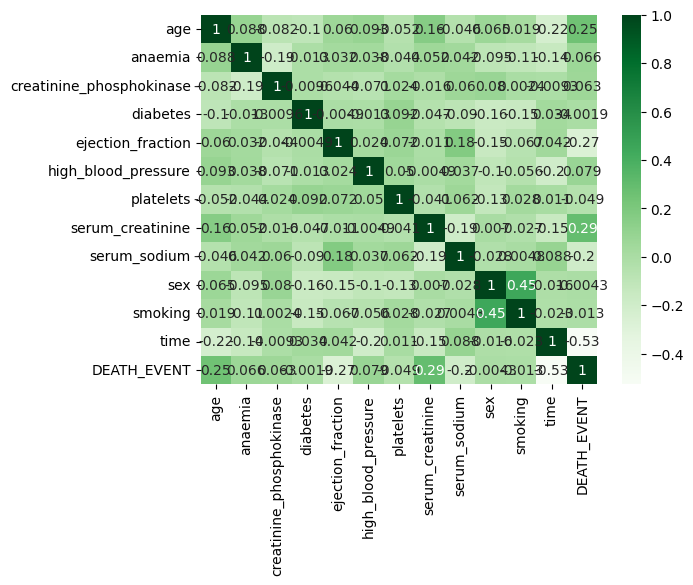

In [25]:
#Draw Heatmap
sns.heatmap(HF.corr(),annot=True,cmap='Greens')
plt.show()

In [36]:
#Pisahkan antara fitur dan label
X = HF.drop('sex', axis = 1)
y = HF['sex']

In [37]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [38]:
y

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [39]:
#Spliting data menjadi train data dan test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y ,test_size =0.3, random_state=200)

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (209, 12)
The shape of X_test is: (90, 12)
The shape of y_train is: (209,)
The shape of y_test is: (90,)


In [40]:
#Model Training
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
#Prediksi pada data train
pred_train = model.predict(X_train)

cm = confusion_matrix(y_train, pred_train)

#Confusion Matrix
print(f'Confusion matrix Decision Tree\n {cm}')
print('')

#Akurasi
print(f'Akurasi pada saat training: {accuracy_score(y_train,pred_train)}')#Confusion Matrix

Confusion matrix Decision Tree
 [[ 73   0]
 [  0 136]]

Akurasi pada saat training: 1.0


In [42]:
#Prediksi pada data test
pred_test = model.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print(f'Confusion_matrix Naive Bayes\n {cm}')
print('')
print(f'Akurasi pada data test: {accuracy}')
print(f'Precision: {precision}')
print(f'recall: {recall}')
print(f'f1-score: {f1}')

Confusion_matrix Naive Bayes
 [[18 14]
 [21 37]]

Akurasi pada data test: 0.6111111111111112
Precision: 0.6111111111111112
recall: 0.6111111111111112
f1-score: 0.6111111111111112


In [45]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.46      0.56      0.51        32
           1       0.73      0.64      0.68        58

    accuracy                           0.61        90
   macro avg       0.59      0.60      0.59        90
weighted avg       0.63      0.61      0.62        90

